In [3]:
import numpy as np
import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from data_classes import *


### Obtain training and validation split numbers

In [4]:
## CHANGE THIS
data_path = "./harness/combined.npy"

In [5]:
batch_size = 2
num_ctx_frames = 5
num_tgt_frames = 5
split_ratio=[0.8, 0.2, 0.0]
liveness_datamodule = LivenessDataModule(batch_size, 
                                         num_ctx_frames, num_tgt_frames,
                                         data_path,
                                         split_ratio=split_ratio)

liveness_datamodule.setup()                                         

In [6]:
liveness_datamodule.split

[6, 1, 1]

### Plot sample seqeunce for thesis

In [9]:
data_path = "../data/harness/combined.npy"
data = LivenessDataset(5, 5, data_path)
arr = np.load(data_path)

TypeError: LivenessDataset.__init__() got an unexpected keyword argument 'split_ratio'

In [10]:
len(arr)

8

In [11]:
def make_liveness_plot(arr, id):

    def show_frames(frames, ax, start_id, row_label=None):
        for i, frame in enumerate(frames):
            ax[i].imshow(frame)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            ax[i].set_xlabel(f"t={start_id+i}")
            ax[i].xaxis.set_label_coords(.52, 1.1)

        if row_label is not None:
            ax[0].set_ylabel(row_label)


    fig, ax = plt.subplots(2, 5, figsize = (6, 4))

    show_frames(arr[id, :5], ax[0], 1)
    show_frames(arr[id, 5:], ax[1], 6)

    fig.set_facecolor("white")
    plt.savefig("sample_plot.pdf")

    return fig

In [43]:
i = 0

3


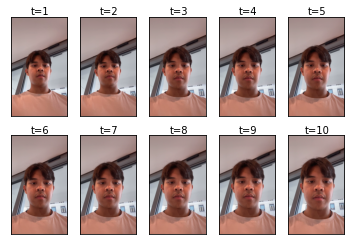

In [47]:
print(i)
make_liveness_plot(arr, i)
i += 1

0. Arthur, noisy bg
1. Kelvin, noisy bg
2. Kelvin, simple bg *
3. Kelvin, window bg
4. Arthur, noisy bg
5. Arthur, clean bg *
6. Arthur, sudden movement
7. Kelvin, inconsistent movement


### Save selected videos

In [31]:
to_keep = [2, 3, 5]
np.save("selected.npy", arr[to_keep])

In [9]:
data_mod = LivenessDataModule(10, 5, 5, data_path,
                 split_ratio=[0.7, 0.15, 0.15])
data_mod.setup()

In [10]:
train_dataloader = data_mod.train_dataloader()
for x_batch, y_batch in train_dataloader:
    break
print(x_batch.shape)
print(y_batch.shape)  # N x C

torch.Size([10, 1, 5, 852, 480])
torch.Size([10, 1, 5, 852, 480])
